In [3]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
path = "clouds\Train\Cloud"
images_clouds = []

for filename in os.listdir("clouds\Train\Cloud"):
    img = cv2.imread(os.path.join(path,filename))
    if img is not None:
        images_clouds.append(img)

#read rain clouds 
path1 = "clouds\Train\RainCloud"
images_rains = []     

for filename in os.listdir(path1):
    img = cv2.imread(os.path.join(path1,filename))
    if img is not None:
        images_rains.append(img)


pixel percentage: 53.71


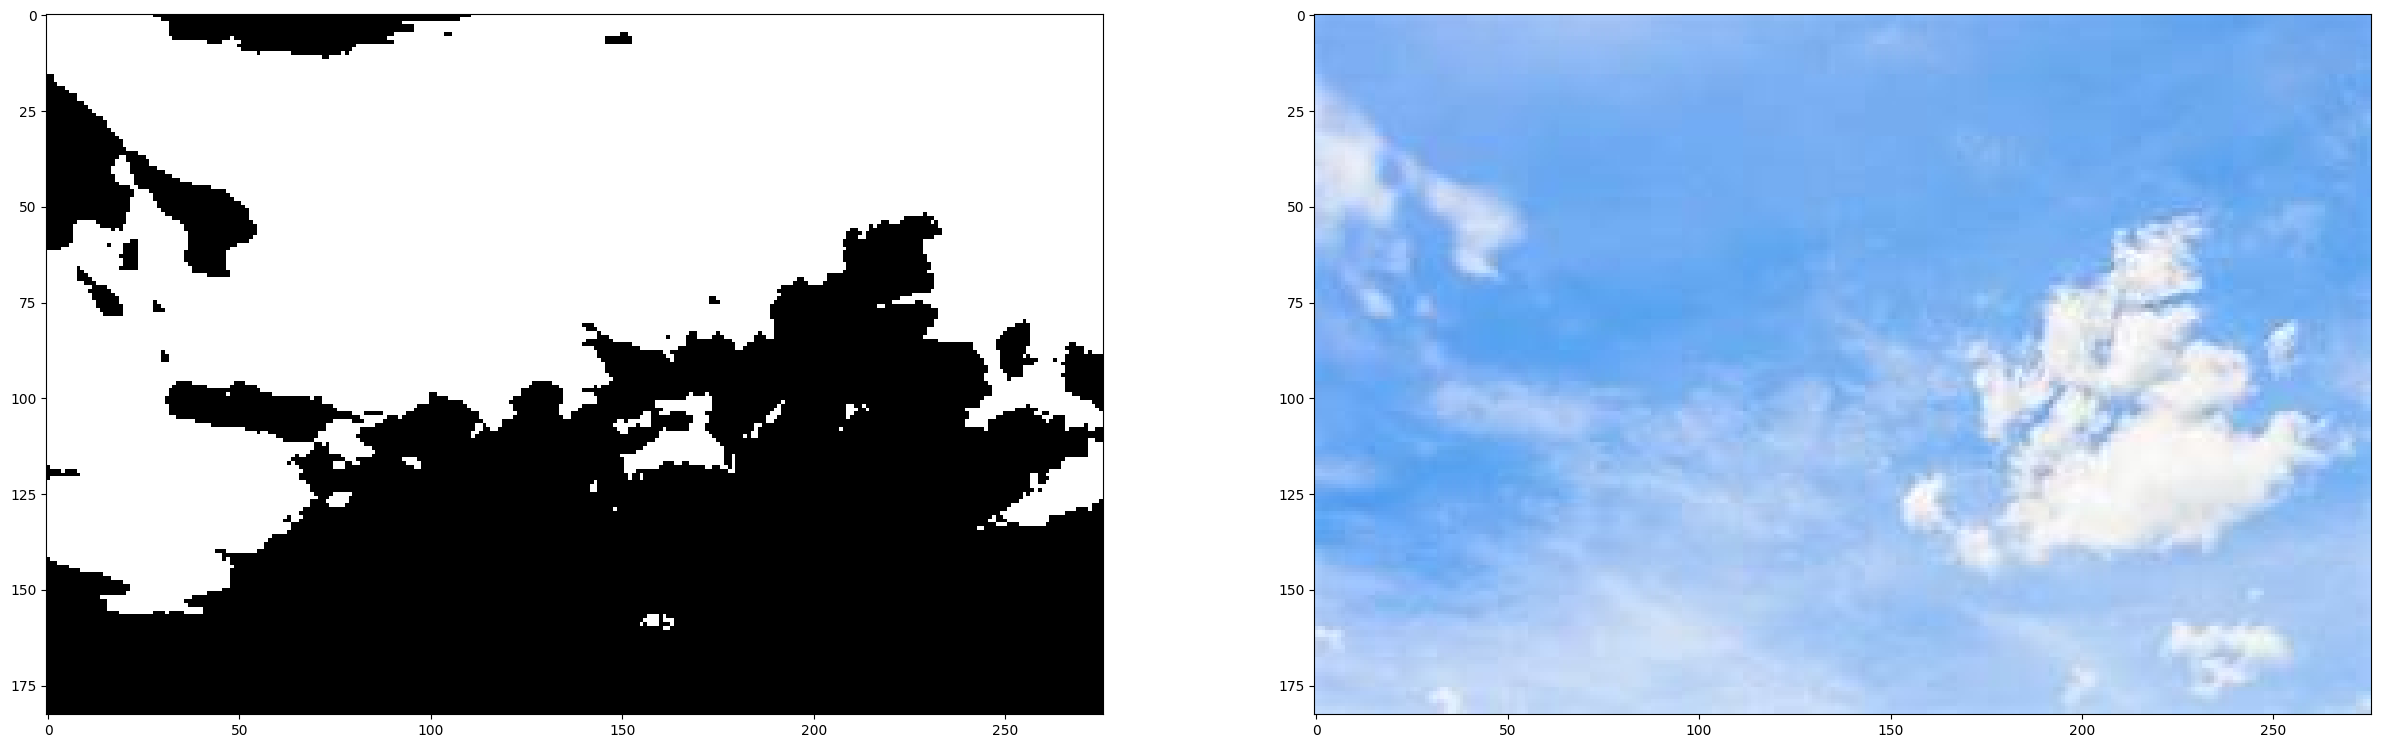

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = images_clouds[90]   # you can read in images with opencv
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

rgb_color1 = np.asarray([0, 0, 100])   # white!
rgb_color2 = np.asarray([144, 255, 255])   # yellow! note the order

mask = cv.inRange(img_rgb, rgb_color1, rgb_color2)
#show = cv2.bitwise_and(frame,frame)
ratio = cv.countNonZero(mask)/(img_rgb.size/3)
print('pixel percentage:', np.round(ratio*100, 2))

plt.figure(figsize = (30,30))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')   # this colormap will display in black / white
plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.show()

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image (replace 'images_clouds[1]' with the actual image path or image array)
for i in range(len(images_clouds)):
    img = images_clouds[i]  # Assuming images_clouds is already defined
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Define the RGB range for blue color
    rgb_color1 = np.asarray([0, 0, 100])  # Lower bound of blue
    rgb_color2 = np.asarray([144, 255, 255])  # Upper bound of blue

    # Create a mask for blue color
    mask = cv.inRange(img_rgb, rgb_color1, rgb_color2)

    # Calculate the percentage of blue pixels
    ratio = cv.countNonZero(mask) / (img_rgb.size / 3)

    print('Blue pixel percentage: ', np.round(ratio * 100, 2))


Blue pixel percentage:  47.74
Blue pixel percentage:  69.28
Blue pixel percentage:  75.63
Blue pixel percentage:  46.54
Blue pixel percentage:  34.94
Blue pixel percentage:  32.99
Blue pixel percentage:  34.65
Blue pixel percentage:  69.21
Blue pixel percentage:  35.69
Blue pixel percentage:  71.75
Blue pixel percentage:  42.17
Blue pixel percentage:  21.45
Blue pixel percentage:  38.91
Blue pixel percentage:  50.05
Blue pixel percentage:  33.06
Blue pixel percentage:  31.19
Blue pixel percentage:  68.33
Blue pixel percentage:  45.97
Blue pixel percentage:  66.89
Blue pixel percentage:  32.12
Blue pixel percentage:  89.45
Blue pixel percentage:  71.22
Blue pixel percentage:  34.6
Blue pixel percentage:  57.76
Blue pixel percentage:  64.75
Blue pixel percentage:  68.23
Blue pixel percentage:  66.28
Blue pixel percentage:  72.38
Blue pixel percentage:  77.77
Blue pixel percentage:  53.08
Blue pixel percentage:  55.06
Blue pixel percentage:  71.75
Blue pixel percentage:  57.62
Blue pixel 

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image (replace 'images_clouds[1]' with the actual image path or image array)
for i in range(len(images_clouds)):
    img = images_clouds[i]  # Assuming images_clouds is already defined
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    

    # Define the RGB range for blue color
    rgb_color1 = np.asarray([0, 0, 100])  # Lower bound of blue
    rgb_color2 = np.asarray([144, 255, 255])  # Upper bound of blue

    thresh2 = cv.adaptiveThreshold(img_rgb, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv.THRESH_BINARY, 199, 5)

    # Create a mask for blue color
    mask = cv.inRange(img_rgb, rgb_color1, rgb_color2)

    # Calculate the percentage of blue pixels
    ratio = cv.countNonZero(thresh2) / (img_rgb.size / 3)

    print('Blue pixel percentage: ', np.round(ratio * 100, 2))

NameError: name 'images_clouds' is not defined

In [281]:
 # define a video capture object 
import cv2
import numpy as np

vid = cv2.VideoCapture(0) 

rgb_color1 = np.asarray([70, 50, 120])   # white!
rgb_color2 = np.asarray([115, 245, 255])

kernel_sharp = 1/3*np.array([[0,-1,0], 
                             [-1,5,-1],
                             [0,-1,0]])
kernel_blur = 1/11*np.array([[1,2,1], 
                             [2,4,2],
                             [1,-2,1]])

while(True): 
        
    ret, frame = vid.read() 
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    # Display the resulting frame 
    mask = cv2.inRange(hsv, rgb_color1, rgb_color2)
    show = cv2.bitwise_and(frame,frame,mask=cv2.bitwise_not(mask))
    ratio = 1-cv2.countNonZero(mask) / (frame.size / 3)
    print = str(np.round(ratio * 100, 2))


    sharpened = cv2.filter2D(frame, -1, kernel_sharp) 

    mask = cv2.putText(mask,"Cloud coverage :"+print,(40,40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    cv2.imshow('frame', show)
    cv2.imshow('mask',mask) 

    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    

vid.release() 

cv2.destroyAllWindows()

# First Idea #

The first idea is to use image processing as a main predictor. We can use live camera to detect clouds. If the cloud is packed and lumpy, raining is possible, if not raining is not possible (in bright blue sky, percentage of raining is nearly 0).

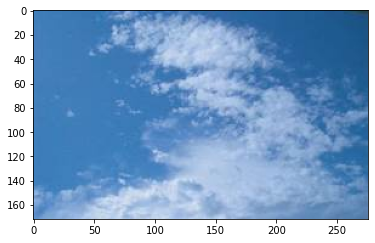

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

ori = cv2.cvtColor(cv2.imread('Cloud_copy\Cloud\cloud580.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(ori)

In [24]:
kernel = np.ones((5,5),np.float32)
change = cv2.morphologyEx(ori,cv2.MORPH_OPEN,kernel)

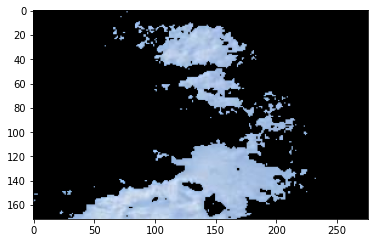

In [25]:
rgb_color1 = np.asarray([0, 10, 50])   # white!
rgb_color2 = np.asarray([150, 180, 255])

mask = cv2.inRange(ori, rgb_color1, rgb_color2)
show = cv2.bitwise_and(ori,ori,mask=cv2.bitwise_not(mask))
plt.imshow(show,cmap='gray')

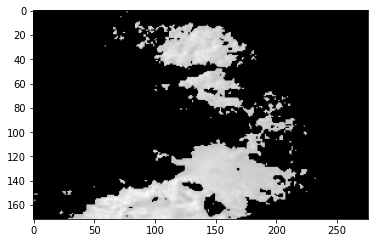

In [26]:
gray = cv2.cvtColor(show,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

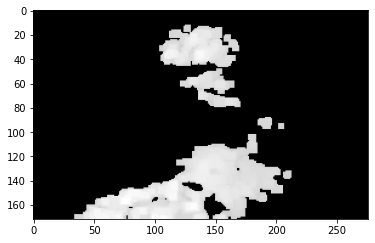

In [27]:
kernel = np.ones((5,5),np.float32)
morph = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
plt.imshow(morph,cmap='gray')

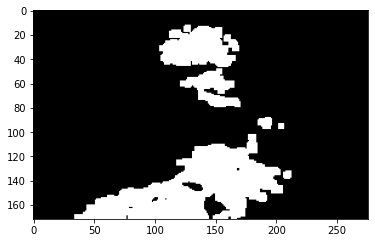

In [28]:
ret,thresh = cv2.threshold(morph,70,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray')

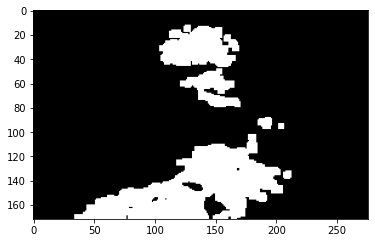

In [29]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,cmap='gray')

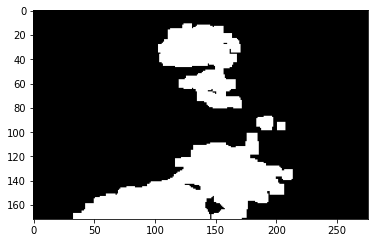

In [30]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
plt.imshow(sure_bg,cmap='gray')

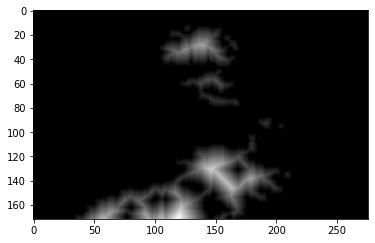

In [31]:
dist = cv2.distanceTransform(morph,cv2.DIST_L1,3)
cv2.normalize(dist,dist,0,1.0,cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

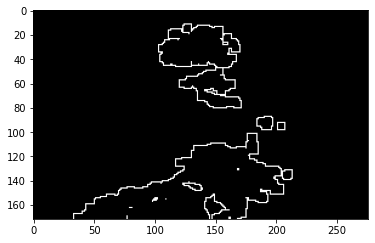

In [32]:
ret, sure_fg = cv2.threshold(dist,0.01*dist.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray')

In [33]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

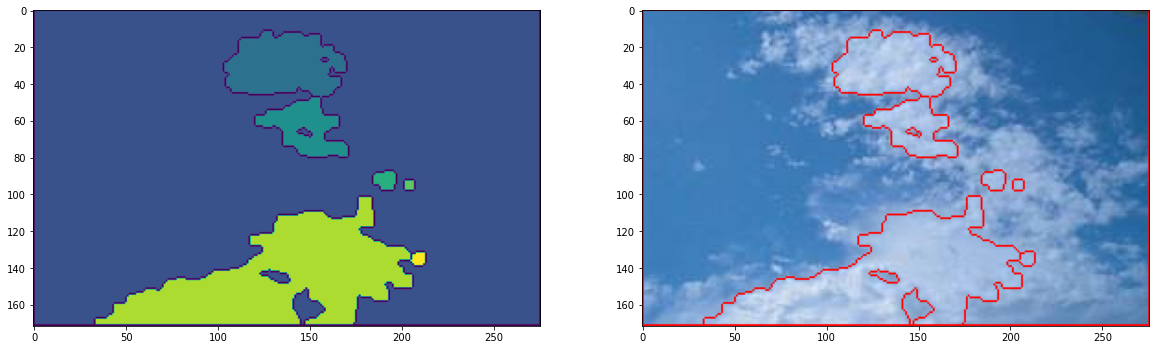

In [34]:
markers = cv2.watershed(ori,markers)
ori[markers == -1] = [255,0,0]

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(markers)
plt.subplot(1,2,2)
plt.imshow(ori)

## Now we are going to split the channel from each value and evaluate the model based on the value

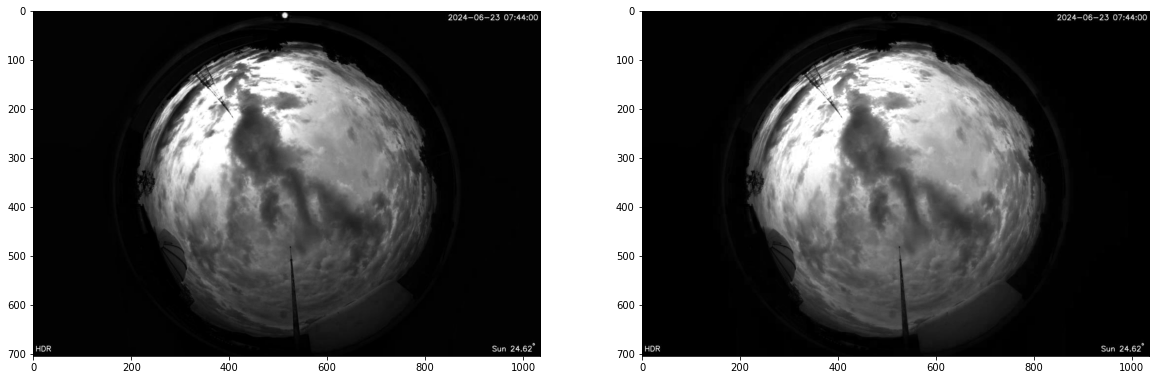

In [225]:
ori = cv2.imread(r'All_sky_camera_Astropark_Chaingmai\2024-06-23\638547002483839893.png')

blue,green,red = cv2.split(ori)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(red,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(blue,cmap='gray')

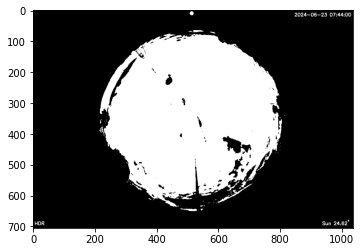

In [217]:
ret,thresh = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

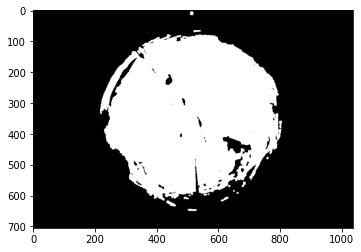

In [218]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,cmap='gray')

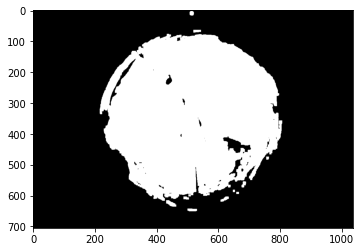

In [219]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
plt.imshow(sure_bg,cmap='gray')

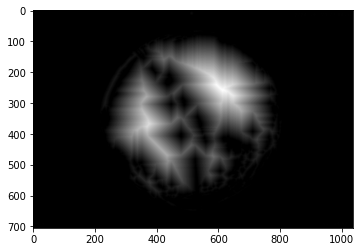

In [220]:
dist = cv2.distanceTransform(thresh,cv2.DIST_L1,3)
cv2.normalize(dist,dist,0,1.0,cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

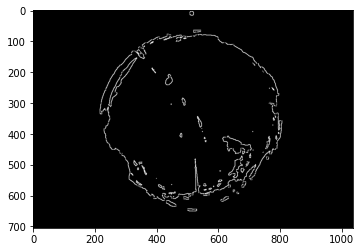

In [221]:
ret, sure_fg = cv2.threshold(dist,0.01*dist.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray')

In [222]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

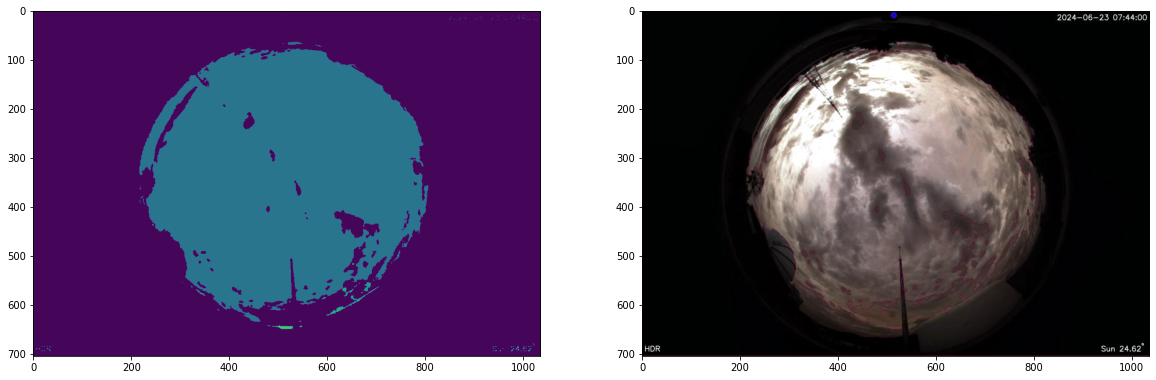

In [223]:
markers = cv2.watershed(ori,markers)
ori[markers == -1] = [100,2,50]

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(markers)
plt.subplot(1,2,2)
plt.imshow(ori)